In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load dataset
file_path = "MLL_4.xlsx"
df = pd.read_excel(file_path)

print("Initial dataset shape:", df.shape)

Initial dataset shape: (72, 12534)


In [3]:
# Step 2: Separate features and target (assuming last column is target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
# Step 3: Optimized mRMR (using all features)
def optimized_mrmr(X, y, n_features=17):
    # Calculate mutual information for all features
    relevance = mutual_info_classif(X, y, discrete_features='auto')
    relevance_dict = dict(zip(X.columns, relevance))

    # Compute full correlation matrix once (saves time)
    corr_matrix = X.corr().abs()

    selected_features = []
    remaining_features = list(X.columns)

    # Select first feature (highest relevance)
    first_feature = max(relevance_dict, key=relevance_dict.get)
    selected_features.append(first_feature)
    remaining_features.remove(first_feature)

    print(f"Feature 1 selected: {first_feature}")

    # Iteratively select remaining features
    while len(selected_features) < n_features:
        best_score = -np.inf
        best_feature = None

        for feature in remaining_features:
            rel = relevance_dict[feature]
            # Redundancy: average correlation with selected features (fast lookup)
            redundancy = corr_matrix.loc[feature, selected_features].mean()
            score = rel - redundancy

            if score > best_score:
                best_score = score
                best_feature = feature

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        print(f"Feature {len(selected_features)} selected: {best_feature}")

    return selected_features

selected_features = optimized_mrmr(X, y, n_features=17)
print("\nTop 20 Selected Features (mRMR):")
print(selected_features)

Feature 1 selected: 36239_at
Feature 2 selected: 40763_at
Feature 3 selected: 35974_at
Feature 4 selected: 35164_at
Feature 5 selected: 31886_at
Feature 6 selected: 33800_at
Feature 7 selected: 40282_s_at
Feature 8 selected: 39712_at
Feature 9 selected: 854_at
Feature 10 selected: 32847_at
Feature 11 selected: 1914_at
Feature 12 selected: 37359_at
Feature 13 selected: 31575_f_at
Feature 14 selected: 37539_at
Feature 15 selected: 33030_at
Feature 16 selected: 40749_at
Feature 17 selected: 32579_at

Top 20 Selected Features (mRMR):
['36239_at', '40763_at', '35974_at', '35164_at', '31886_at', '33800_at', '40282_s_at', '39712_at', '854_at', '32847_at', '1914_at', '37359_at', '31575_f_at', '37539_at', '33030_at', '40749_at', '32579_at']


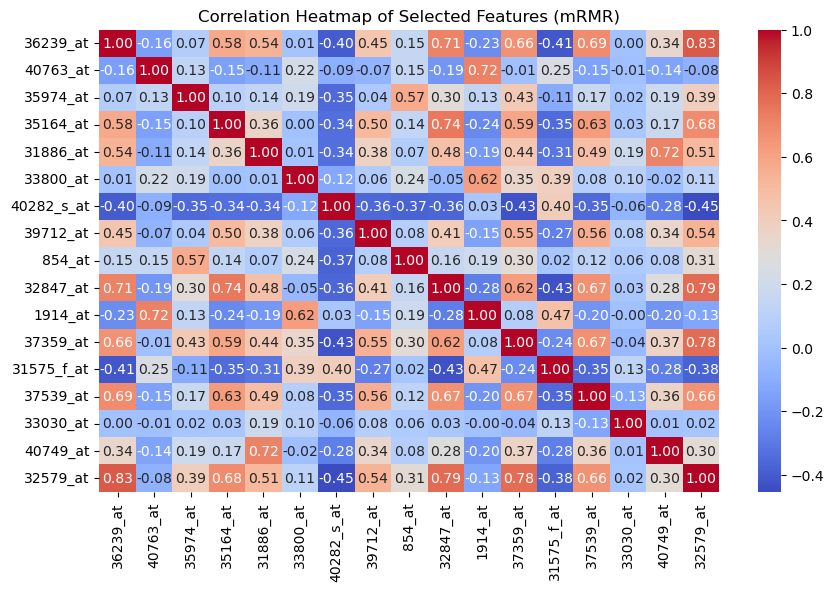

In [5]:
# Visualization 1: Correlation heatmap of selected features
plt.figure(figsize=(10, 6))
sns.heatmap(X[selected_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Selected Features (mRMR)")
plt.show()

In [6]:
# Step 4: Scaling (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X[selected_features]), columns=selected_features)

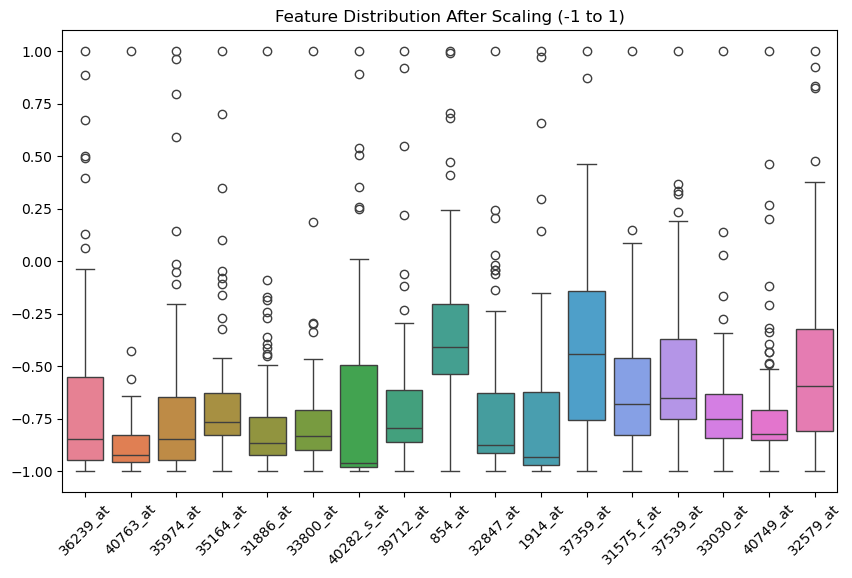

In [7]:
# Visualization 2: Distribution after scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_scaled)
plt.title("Feature Distribution After Scaling (-1 to 1)")
plt.xticks(rotation=45)
plt.show()

In [8]:
# Step 5: Randomize
np.random.seed(42)
shuffled_indices = np.random.permutation(len(X_scaled))
X_randomized = X_scaled.iloc[shuffled_indices].reset_index(drop=True)
y_randomized = y.iloc[shuffled_indices].reset_index(drop=True)

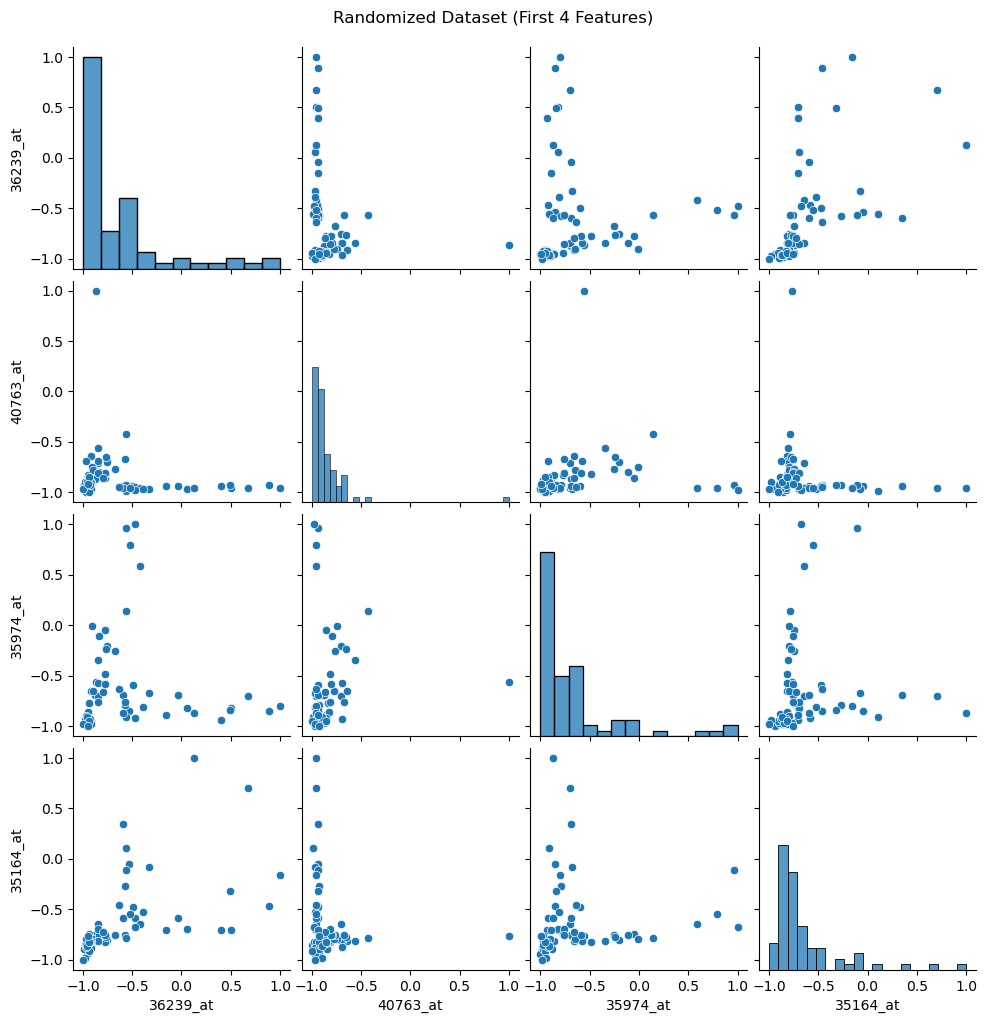

In [9]:
# Visualization 3: Pairplot (first 4 features)
sns.pairplot(X_randomized.iloc[:, :4])
plt.suptitle("Randomized Dataset (First 4 Features)", y=1.02)
plt.show()

In [10]:
print("\nFinal dataset shape after mRMR, scaling, and randomization:", X_randomized.shape)


Final dataset shape after mRMR, scaling, and randomization: (72, 17)


In [11]:
# Combine the processed (randomized) features and target back together
final_dataset = pd.concat([X_randomized, y_randomized.rename("Target")], axis=1)

# Display the final dataset
print("\n✅ Final Processed Dataset (After mRMR, Scaling, and Randomization):")
display(final_dataset.head(20))  # show first 20 rows

print("\nFinal dataset shape:", final_dataset.shape)


✅ Final Processed Dataset (After mRMR, Scaling, and Randomization):


,36239_at,40763_at,35974_at,35164_at,31886_at,33800_at,40282_s_at,39712_at,854_at,32847_at,1914_at,37359_at,31575_f_at,37539_at,33030_at,40749_at,32579_at,Target
0,-0.534607,-0.934446,-0.853030,-0.047825,-0.821377,-0.746294,-0.984224,-0.523518,0.153458,-0.828715,-0.970319,-0.114741,-0.876444,-0.339194,-0.844610,-0.392531,-0.407241,0
1,-0.946513,-0.843678,-0.880317,-0.890685,-0.947403,-0.898203,0.249498,-0.851625,-0.792864,-0.915869,-0.151616,-0.795881,-0.438915,-0.668370,-0.674328,-0.850069,-0.862956,2
2,-0.576899,-0.929700,-0.790145,-0.268955,-0.728421,-0.754952,-0.986485,-0.061950,-0.360909,-0.439295,-0.979945,-0.012478,-0.812972,0.320998,-0.804791,-0.771508,-0.407092,0
3,0.886166,-0.930797,-0.851512,-0.465789,-0.441479,-0.712974,-0.986083,-0.789254,-0.299179,-0.238539,-0.980312,0.074769,-0.855862,-0.241075,-0.817417,-0.513831,0.377229,0
4,-0.862106,1.000000,-0.559155,-0.769705,-0.849499,-0.894267,-0.871885,-0.667304,-0.379223,-0.895214,1.000000,-0.565385,-0.454629,-0.682069,-0.932988,-0.840387,-0.559994,1
5,-0.932652,-0.921987,-0.957401,-0.807365,-0.919021,-0.753903,0.539942,-0.859656,-0.406063,-0.907809,-0.469058,-0.479355,-0.029425,-0.793498,-0.655552,-0.859751,-0.725913,2
6,0.672323,-0.955358,-0.701937,0.698550,-0.492514,-0.771743,-0.981059,-0.629446,-0.223240,-0.137028,-0.947972,0.463528,-0.861346,0.367410,-0.726449,-0.839834,1.000000,0
7,-0.879343,-0.870226,-0.690616,-0.752541,-0.864861,-0.745507,-0.978346,-0.735755,-0.383328,-0.893199,-0.574375,-0.240337,0.022031,-0.674913,-0.341858,-0.825173,-0.952124,1
8,-0.496402,-0.939488,-0.598416,-0.475754,-0.184221,-0.855175,-0.980607,-0.297514,-0.314809,-0.642821,-0.963557,-0.346251,-0.816361,-0.102433,-0.696989,1.000000,-0.576900,0
9,-0.772368,-0.853763,-0.052807,-0.748209,-0.936206,-0.852551,-0.976939,-0.949140,-0.197348,-0.922922,-0.934563,-0.497210,-0.874904,-0.837457,-0.652315,-0.890456,-0.691801,2



Final dataset shape: (72, 18)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [13]:
# 1) Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X_randomized,
    y_randomized,
    test_size=0.6,      # 20% for testing
    random_state=42,    # for reproducibility
    stratify=y_randomized  # optional, good for classification
)

# 2) Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

# 3) Predict and get accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Total samples: 72
Training samples: 28 (38.89%)
Testing samples: 44 (61.11%)
Random Forest Accuracy: 95.45%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        17

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44

